# Proyecto Deep Learning – MLP (Datos tabulares)

En este notebook uso un **Multi-Layer Perceptron (MLP)** para clasificar tumores
de mama como **benignos** o **malignos** usando el dataset Breast Cancer de
scikit-learn.

El objetivo es entrenar un modelo sencillo y ver qué tan bien puede predecir
el tipo de tumor a partir de las características numéricas.


## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


## Cargar datos y EDA básica

Shape del dataset: (569, 31)
Clases: {0: np.str_('malignant'), 1: np.str_('benign')}


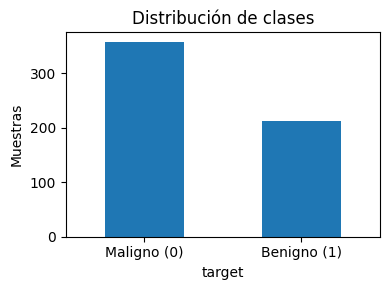

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

df.head()

print("Shape del dataset:", df.shape)
print("Clases:", dict(zip(range(len(target_names)), target_names)))
df["target"].value_counts()

class_counts = df["target"].value_counts()
plt.figure(figsize=(4,3))
class_counts.plot(kind="bar")
plt.xticks([0,1], ["Maligno (0)", "Benigno (1)"], rotation=0)
plt.title("Distribución de clases")
plt.ylabel("Muestras")
plt.tight_layout()
plt.show()

## Preprocesamiento

In [3]:
X = df.drop("target", axis=1).values
y = df["target"].values

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape)
print("Val:  ", X_val.shape)
print("Test: ", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

Train: (398, 30)
Val:   (85, 30)
Test:  (86, 30)


## Definir el modelo MLP

In [4]:
input_dim = X_train_scaled.shape[1]

tf.random.set_seed(42)

model = Sequential([
    Dense(32, activation="relu", input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento

In [5]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=40,
    batch_size=32,
    verbose=1
)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4089 - loss: 0.9056 - val_accuracy: 0.6000 - val_loss: 0.6704
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7090 - loss: 0.6122 - val_accuracy: 0.8706 - val_loss: 0.4833
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8597 - loss: 0.4410 - val_accuracy: 0.9059 - val_loss: 0.3626
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9264 - loss: 0.3087 - val_accuracy: 0.9176 - val_loss: 0.2811
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9294 - loss: 0.2502 - val_accuracy: 0.9294 - val_loss: 0.2266
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9391 - loss: 0.1942 - val_accuracy: 0.9294 - val_loss: 0.1918
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9543 - loss: 0.1628 - val_accuracy: 0.9176 - val_loss: 0.1675
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9638 - loss: 0.1431 - val_accuracy: 0.9176 - val_los

## Curvas de entrenamiento

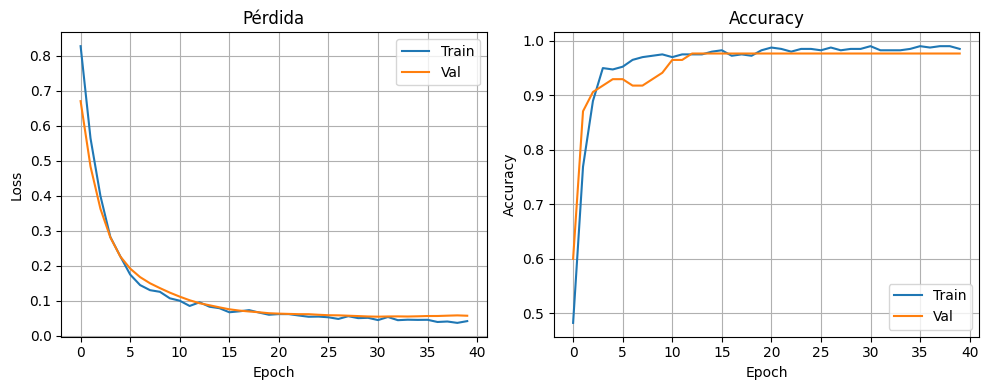

In [6]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Pérdida")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluación en test

In [7]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss en test: {test_loss:.4f}")
print(f"Accuracy en test: {test_acc:.4f}")

Loss en test: 0.1024
Accuracy en test: 0.9419


## Matriz de confusión y métricas

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


<Figure size 400x400 with 0 Axes>

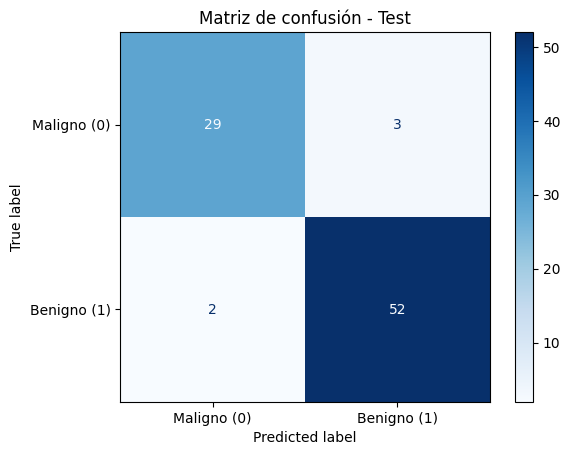

              precision    recall  f1-score   support

     Maligno       0.94      0.91      0.92        32
     Benigno       0.95      0.96      0.95        54

    accuracy                           0.94        86
   macro avg       0.94      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



In [8]:
y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Maligno (0)", "Benigno (1)"]
)

plt.figure(figsize=(4,4))
disp.plot(values_format="d", cmap="Blues")
plt.title("Matriz de confusión - Test")
plt.show()

print(classification_report(
    y_test, y_pred,
    target_names=["Maligno", "Benigno"]
))

## Ejemplos de errores y aciertos

In [9]:
incorrect_idx = np.where(y_test != y_pred)[0]
correct_idx   = np.where(y_test == y_pred)[0]

print("Total test:", len(y_test))
print("Correctos:", len(correct_idx))
print("Incorrectos:", len(incorrect_idx))

n_to_show = min(5, len(incorrect_idx))
print("\nPredicciones incorrectas:\n")

for i in range(n_to_show):
    idx = incorrect_idx[i]
    print(f"Ejemplo {i+1}")
    print("  Real:", y_test[idx], "-", target_names[y_test[idx]])
    print("  Prob. clase 1 (benigno):", round(y_pred_proba[idx], 4))
    print("  Predicción:", y_pred[idx], "-", target_names[y_pred[idx]])
    print("-"*30)

n_to_show = min(5, len(correct_idx))
print("\nPredicciones correctas:\n")

for i in range(n_to_show):
    idx = correct_idx[i]
    print(f"Ejemplo {i+1}")
    print("  Real:", y_test[idx], "-", target_names[y_test[idx]])
    print("  Prob. clase 1 (benigno):", round(y_pred_proba[idx], 4))
    print("  Predicción:", y_pred[idx], "-", target_names[y_pred[idx]])
    print("-"*30)


Total test: 86
Correctos: 81
Incorrectos: 5

Predicciones incorrectas:

Ejemplo 1
  Real: 0 - malignant
  Prob. clase 1 (benigno): 0.5816
  Predicción: 1 - benign
------------------------------
Ejemplo 2
  Real: 0 - malignant
  Prob. clase 1 (benigno): 0.9573
  Predicción: 1 - benign
------------------------------
Ejemplo 3
  Real: 1 - benign
  Prob. clase 1 (benigno): 0.3753
  Predicción: 0 - malignant
------------------------------
Ejemplo 4
  Real: 1 - benign
  Prob. clase 1 (benigno): 0.3325
  Predicción: 0 - malignant
------------------------------
Ejemplo 5
  Real: 0 - malignant
  Prob. clase 1 (benigno): 0.5115
  Predicción: 1 - benign
------------------------------

Predicciones correctas:

Ejemplo 1
  Real: 1 - benign
  Prob. clase 1 (benigno): 0.9896
  Predicción: 1 - benign
------------------------------
Ejemplo 2
  Real: 0 - malignant
  Prob. clase 1 (benigno): 0.0
  Predicción: 0 - malignant
------------------------------
Ejemplo 3
  Real: 0 - malignant
  Prob. clase 1 (be